<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF-285 - Computación Científica </h1>
    <h2> Playing with Julia </h2>
    <h2> <a href="#acknowledgements"> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> Version: 1.03 </h2>
</center>



<div id='toc' />

## Table of Contents
* [Introduction](#intro)

* [Libraries](#libraries)
* [Acknowledgements](#acknowledgements)

In [1]:
import Pkg; Pkg.add("Plots")
using Plots
import Pkg; Pkg.add("Dates")
using Dates

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed GR_jll ──────────────────── v0.73.5+0
   Installed JpegTurbo_jll ───────────── v3.0.3+0
   Installed Libmount_jll ────────────── v2.40.1+0
   Installed Xorg_xkbcomp_jll ────────── v1.4.6+0
   Installed Unitful ─────────────────── v1.19.1
   Installed RelocatableFolders ──────── v1.0.1
   Installed LoggingExtras ───────────── v1.0.3
   Installed Preferences ─────────────── v1.4.3
   Installed ColorSchemes ────────────── v3.25.0
   Installed OpenSSL ─────────────────── v1.4.3
   Installed Contour ─────────────────── v0.6.3
   Installed PlotUtils ───────────────── v1.4.1
   Installed ConcurrentUtilities ─────── v2.4.1
   Installed Xorg_libSM_jll ──────────── v1.2.4+0
   Installed Xorg_libpthread_stubs_jll ─ v0.1.1+0
   Installed RecipesPipeline ─────────── v0.6.12
   Installed HTTP ────────────────────── v1.10.8
   Installed GR ──────────────────────── v0.73.5
   Installed DelimitedFi

<div id='intro' />

# Introduction
[Back to TOC](#toc)

In this jupyter notebook we will playing with Julia, so you should install it first and then run it!

The problem we will handle here is the computation of following series:
\begin{equation}
    \sum_{k=1}^\infty \dfrac{1}{k^2} = \dfrac{\pi^2}{6}.
\end{equation}
So, you may wonder why do we want to compute its value numerically if we already know it?
This is a perfectly correct question, and the answer to this question is one of the topics we study in this course.

Now, the tricky part, how would you compute its value?
To do this, we need to define an algorithm and then implement it, right?
But, is there only one possible algorithm to do this?
The answer is no! And this is the tricky part, how can we build one that give us the best accuracy within the current computation precision, which is _double precisio_ in this case.

To outline this problem, we will study two algorithms.
To explain them, we need first to expand the series as follows:
\begin{equation}
    \sum_{k=1}^N \dfrac{1}{k^2} + \sum_{k=N+1}^\infty \dfrac{1}{k^2} = \dfrac{\pi^2}{6}.
\end{equation}
Up to this point we have only manipulated algebraically the series and we have not made any approximation.
The main reason we needed to split the series between a finite sum and an infinite sum is to be able to have a finite part and compute it explicitly.
So, as you may think, the error in the computation will be introduced by $\sum_{k=N+1}^\infty \dfrac{1}{k^2}$, which is true, but unfortunately it is not the only source of error, as we will see.
This approximation error will become smaller as we increase the value of $N$.
So, it is important to select a large enough value for $N$ so this error does not becomes dominant.

We now know one source of the error in the computation and we _more or less_ know how to control it.
The next step will be to define the two algorithms mentioned before.
First, we will implement them in Julia and look at their outputs:

In [2]:
# Large N, we will play with a much larger value later!
N = Int(1e6)
x = 0.0
# Notice that way we build the iterator
for k in 1:N
    x = x+k^(-2)
end
println("output Alg. 1: ",x)

y = 0.0
# Here we are buolding the iterator in a reverse way
for k in N:-1:1
    y = y+k^(-2)
end
println("output Alg. 2: ",y)

println("Absolute errors obtained:")
println("abs. error Alg. 1: ",abs(x-pi^2/6))
println("abs. error Alg. 2: ",abs(y-pi^2/6))

output Alg. 1: 1.64493306684877
output Alg. 2: 1.6449330668487265
Absolute errors obtained:
abs. error Alg. 1: 9.999994563525405e-7
abs. error Alg. 2: 9.99999499873283e-7


So, we have the following questions:
- Q1: Do you see the main difference between the algorithms?
- Q2: Do they produce too different values?
- Q3: Is the absolute error computed significatly different?

For a better understaning, we will answer them in a reverse order:
- A3: No
- A2: No
- A1: The main difference is the order in how we are adding the terms. Alg. 1 computes the sum from the smallest integer first up to the largest, where Alg. 2 computes the sum from the largest integer first up to the smallest.
The difference does not seem significant, when do you expect we will see a significant difference? will we see a significant difference? To answer these questions, we will perform a numerical experiment with several values of $N$ and we will analyze what happens. The next cell does this.

N:10
log10(|x-pi^2/6|):0.09516633568168564
log10(|y-pi^2/6|):0.09516633568168564
Time it took the computation: 14 milliseconds
N:100
log10(|x-pi^2/6|):0.009950166663334148
log10(|y-pi^2/6|):0.009950166663333482
Time it took the computation: empty period
N:1000
log10(|x-pi^2/6|):0.0009995001666649461
log10(|y-pi^2/6|):0.0009995001666665004
Time it took the computation: empty period
N:10000
log10(|x-pi^2/6|):9.999500016122376e-5
log10(|y-pi^2/6|):9.999500016655283e-5
Time it took the computation: empty period
N:100000
log10(|x-pi^2/6|):9.999949984074163e-6
log10(|y-pi^2/6|):9.999950000061375e-6
Time it took the computation: empty period
N:1000000
log10(|x-pi^2/6|):9.999994563525405e-7
log10(|y-pi^2/6|):9.99999499873283e-7
Time it took the computation: 2 milliseconds
N:10000000
log10(|x-pi^2/6|):1.0000096684059656e-7
log10(|y-pi^2/6|):9.99999949513608e-8
Time it took the computation: 20 milliseconds
N:100000000
log10(|x-pi^2/6|):9.013651380840315e-9
log10(|y-pi^2/6|):9.99999993922529e-9
T

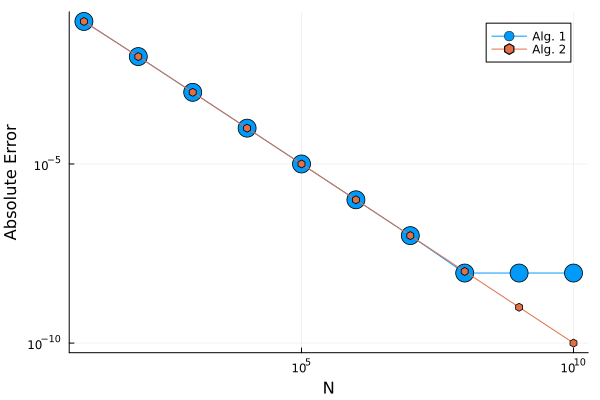

In [3]:
function sum_order_study(N)
    x = 0.0;
    # Alg. 1 : Sum from 'left' to 'right'
    for k in 1:N
        x = x+k^(-2);
    end

    # Alg. 2 : Sum from 'right' to 'left'
    y = 0.0;
    for k in N:-1:1
        y = y+k^(-2);
    end
    return x, y
end

M=10;
Ns = map(x -> Int(ceil(x)), 10 .^(range(1,stop=10,length=10)));
error_x = zeros(M);
error_y = zeros(M);
time_computation = Array{DateTime};

for i in 1:M
    start_time = now();
    x, y = sum_order_study(Ns[i]);
    t = now()-start_time;
    error_x[i] = abs(x-(pi^2)/6);
    error_y[i] = abs(y-(pi^2)/6);
    println("N:",Ns[i])
    println("log10(|x-pi^2/6|):",error_x[i])
    println("log10(|y-pi^2/6|):",error_y[i])
    println("Time it took the computation: ",canonicalize(t))
end

NsF=map(x->Float64(x), Ns)
plot(NsF,error_x,xaxis=:log, yaxis=:log, markershape = :circle, markersize=10, 
    markerwidth=7,ylabel="Absolute Error",xlabel="N", label="Alg. 1")
plot!(NsF,error_y,xaxis=:log, yaxis=:log, markershape = :hexagon, label="Alg. 2")

What is the last plot telling us?
We clearly see that up to $N=10^8$ they both produce approximately the same error, but for $N=10^9$ and $N=10^{10}$ the error of Alg. 2 continues decreasing where for Alg. 1 it stagnates!
Thus, we can conclude that it does matter which algorithm we use for numerical computations!
We will see the explanation for this within the first weeks of the course!

## Final questions
- What would be the largest $N$ we could have used that makes sense? i.e. What is the largest value of $N$ that does not make $0$ _numerically_ the equation $\dfrac{1}{N^2}$?
- Why did we use Julia if we can have used Python for this? Please try and let me know!

<div id='libraries' />

# Libraries
[Back to TOC](#toc)

* Plots: https://docs.juliaplots.org/latest/

<div id='acknowledgements' />

# Acknowledgements
[Back to TOC](#toc)

* _Material originally created by professor Claudio Torres_ (`ctorres@inf.utfsm.cl`). v.1.01. DI UTFSM. March 2022._
* _Update March 2022 - v1.02 - C.Torres_ : Adding a new final question.
* _Update March 2022 - v1.03 - C.Torres_ : Adding installation instruction for libraries.